Length of the csv file 3


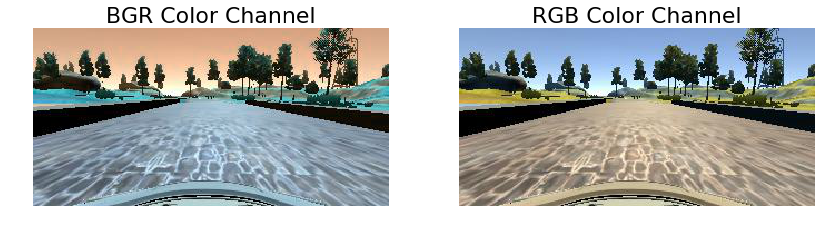

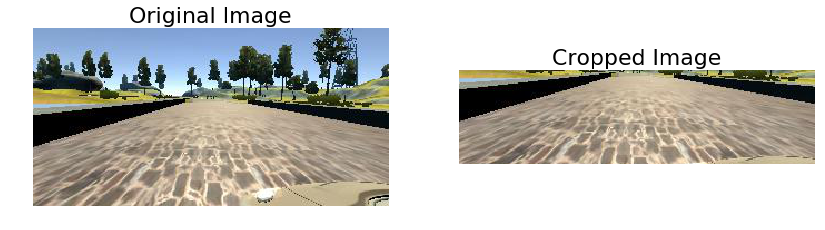

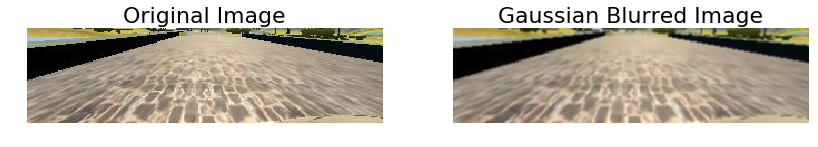

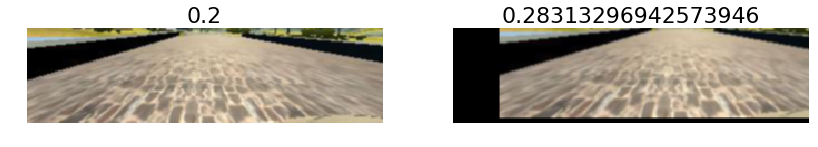

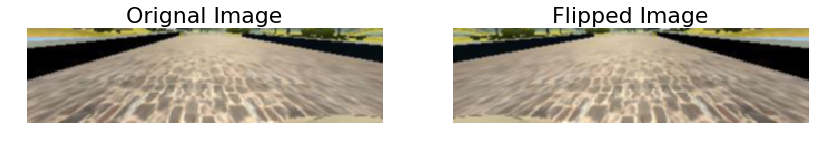

len  24


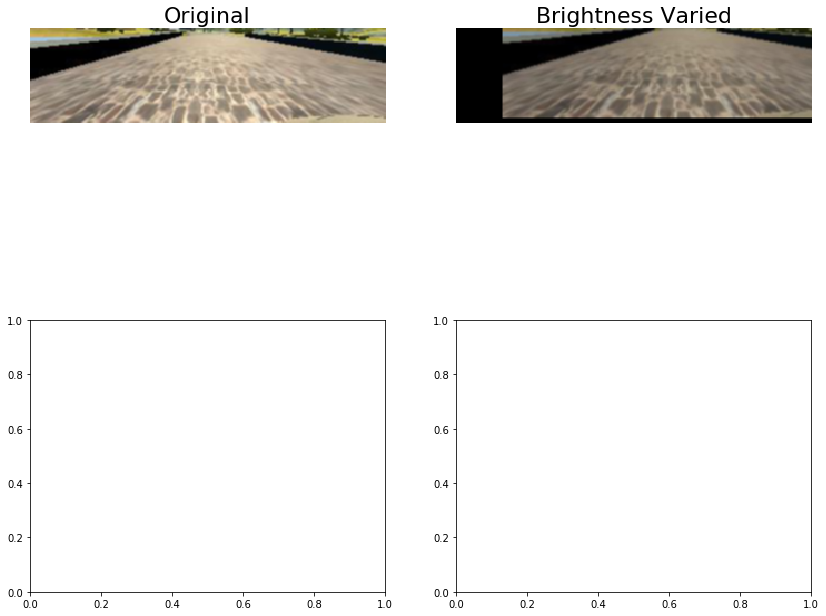

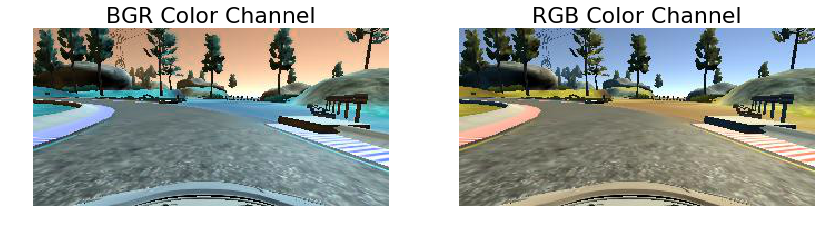

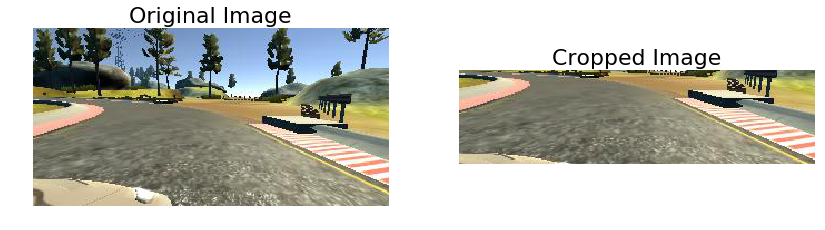

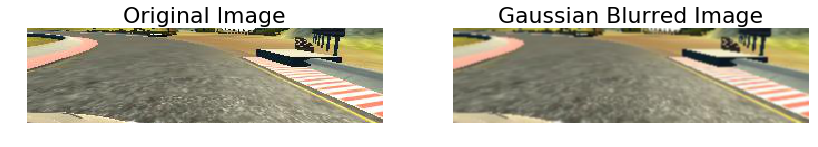

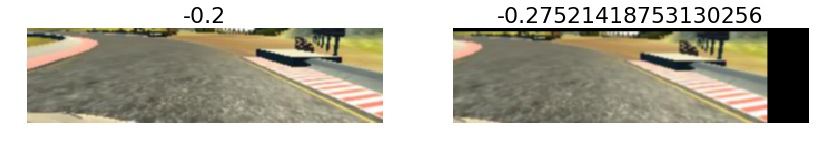

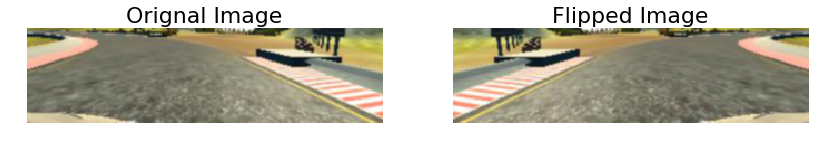

len  12


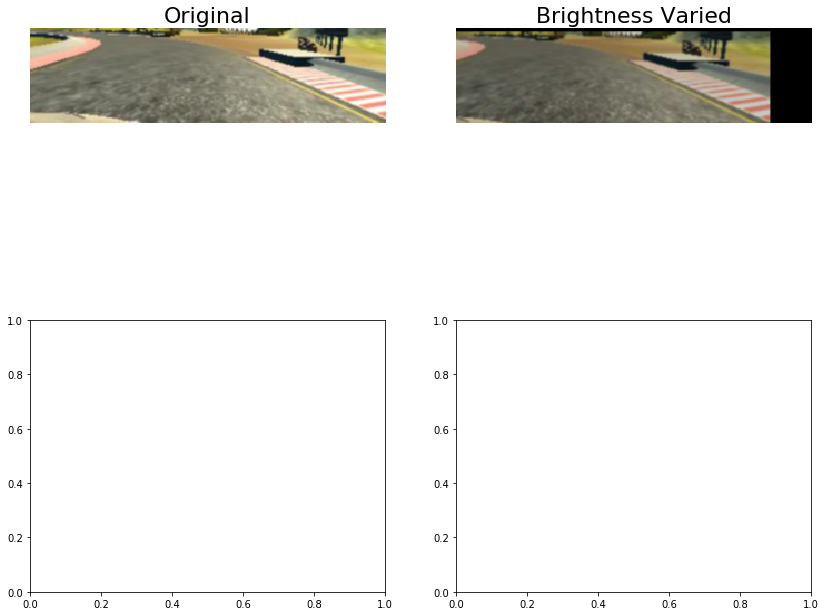

In [8]:
import csv
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

def read_file(filename):
    lines = []
    with open(filename) as csvfile:
        data_rows = csv.reader(csvfile)
        for row in data_rows:
            lines.append(row)
    return lines

#This crops to (72, 320, 3)
def crop_images(X, y):
    images = []
    image_for_plot = []
    steering_angles = []
    top_percent = 0.4
    bottom_percent = 0.15
    
    for i in range(len(X)):
        ind_img = X[i]
        top = int(np.ceil(ind_img.shape[0] * top_percent))
        bottom = ind_img.shape[0] - int(np.ceil(ind_img.shape[0] * bottom_percent))
        cropped_img = ind_img[60:145, :]
        images.append(cropped_img)
        image_for_plot.append(ind_img)
        image_for_plot.append(cropped_img)
        steering_angles.append(y[i])
    #print('cropped -->', images[-1].shape, images[1].shape)

    #Plot Images
#     print('Original {} Cropped {}'.format(image_for_plot[0].shape, image_for_plot[1].shape))
    fig, axs = plt.subplots(1, 2, figsize=(14, 12))
    fig.subplots_adjust(hspace = .4, wspace=.2)
    axs = axs.ravel()
    axs[0].axis('off')
    axs[0].imshow(image_for_plot[0])
    axs[0].set_title('Original Image', fontsize=22)
    axs[1].axis('off')
    axs[1].imshow(image_for_plot[1])
    axs[1].set_title('Cropped Image', fontsize=22)
    plt.show()
    return images, steering_angles

def apply_gamma(X, y):
    images = []
    steering_angles = []
    image_for_plot = []
    for i in range(len(X)):
        gamma = np.random.uniform(0.7, 1.7)
        inv_gamma = 1 / gamma
        map_table = np.array([((i/255.0)**inv_gamma)*255 for i in np.arange(0,256)])
        transformed_img = cv2.LUT(X[i], map_table)
        images.append(X[i])
        steering_angles.append(y[i])
        images.append(transformed_img)
        steering_angles.append(y[i])
        image_for_plot.append(X[i])
        image_for_plot.append(transformed_img)

#     print('Resized {} Gamma {}'.format(image_for_plot[0].shape, image_for_plot[1].shape))
    fig, axs = plt.subplots(1, 2, figsize=(14, 12))
    fig.subplots_adjust(hspace = .4, wspace=.2)
    axs = axs.ravel()
    axs[0].axis('off')
    axs[0].imshow(image_for_plot[0])
    axs[0].set_title('Original Image', fontsize=22)
    axs[1].axis('off')
    axs[1].imshow(image_for_plot[1])
    axs[1].set_title('Gamma Image', fontsize=22)
    plt.show()
    return images, steering_angles

def apply_gaussian_blur(X, y):
    images = []
    steering_angles = []
    image_for_plot = []
    for i in range(len(X)):
        transformed_img = cv2.GaussianBlur(X[i], (3, 3), 0)
        images.append(transformed_img)
        steering_angles.append(y[i])
        image_for_plot.append(X[i])
        image_for_plot.append(transformed_img)

#     print('Resized {} Gamma {}'.format(image_for_plot[0].shape, image_for_plot[1].shape))
    fig, axs = plt.subplots(1, 2, figsize=(14, 12))
    fig.subplots_adjust(hspace = .4, wspace=.2)
    axs = axs.ravel()
    axs[0].axis('off')
    axs[0].imshow(image_for_plot[0])
    axs[0].set_title('Original Image', fontsize=22)
    axs[1].axis('off')
    axs[1].imshow(image_for_plot[1])
    axs[1].set_title('Gaussian Blurred Image', fontsize=22)
    plt.show()
    return images, steering_angles

def vary_brightness(X, y):
    images = []
    steering_angles = []
    image_for_plot = []
    for i in range(len(X)):
        # HSV (Hue, Saturation, Value) - Value is brightness
        hsv_img = cv2.cvtColor(X[i], cv2.COLOR_RGB2HSV)
        random_value = 1.0 + 0.6 * (np.random.rand() - 0.5)
        hsv_img[:,:,2] =  hsv_img[:,:,2] * random_value
        transformed_img =  cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB)
        images.append(transformed_img)
        steering_angles.append(y[i])
        image_for_plot.append(X[i])
        image_for_plot.append(transformed_img)
    print('len ', len(image_for_plot))
    fig, axs = plt.subplots(2, 2, figsize=(14, 12))
    fig.subplots_adjust(hspace = .4, wspace=.2)
    axs = axs.ravel()
    axs[0].axis('off')
    axs[0].imshow(image_for_plot[0])
    axs[0].set_title('Original', fontsize=22)
    axs[1].axis('off')
    axs[1].imshow(image_for_plot[1])
    axs[1].set_title('Brightness Varied', fontsize=22)
    axs[1].axis('off')
    axs[1].imshow(image_for_plot[2])
    axs[1].set_title('Original', fontsize=22)
    axs[1].axis('off')
    axs[1].imshow(image_for_plot[3])
    axs[1].set_title('Brightness Varied', fontsize=22)
    plt.show()
    return images, steering_angles

    
def add_shadow(X, y):
    images = []
    steering_angles = []
    image_for_plot = []
    width, height = X[0].shape[:2]
    for i in range(len(X)):
        x1, y1 = width * np.random.rand(), 0
        x2, y2 = width * np.random.rand(), height
        xm, ym = np.mgrid[0:height, 0:width]
        original_img = X[i]
        mask = np.zeros_like(original_img[:, :, 1])
        mask[(ym - y1) * (x2 - x1) - (y2 - y1) * (xm - x1) > 0] = 1

        # choose which side should have shadow and adjust saturation
        cond = mask == np.random.randint(2)
        s_ratio = np.random.uniform(low=0.2, high=0.5)

        # adjust Saturation in HLS(Hue, Light, Saturation)
        hls = cv2.cvtColor(X[i], cv2.COLOR_RGB2HLS)
        hls[:, :, 1][cond] = hls[:, :, 1][cond] * s_ratio
        shadowed_img = cv2.cvtColor(hls, cv2.COLOR_HLS2RGB)
        images.append(original_img)
        steering_angles.append(y[i])
        images.append(shadowed_img)
        steering_angles.append(y[i])
    image_for_plot.append(X[0])
    image_for_plot.append(X[1])
    image_for_plot.append(X[2])
    image_for_plot.append(X[3])
    

    fig, axs = plt.subplots(2, 2, figsize=(14, 12))
    fig.subplots_adjust(hspace = .4, wspace=.2)
    axs = axs.ravel()
    axs[0].axis('off')
    axs[0].imshow(image_for_plot[0])
    axs[0].set_title('Original', fontsize=22)
    axs[1].axis('off')
    axs[1].imshow(image_for_plot[1])
    axs[1].set_title('Shadowed', fontsize=22)
    axs[1].axis('off')
    axs[1].imshow(image_for_plot[2])
    axs[1].set_title('Original', fontsize=22)
    axs[1].axis('off')
    axs[1].imshow(image_for_plot[3])
    axs[1].set_title('Shadowed', fontsize=22)
    plt.show()
    return images, steering_angles

def flip_images_and_add(X, y):
    #print('size before', len(X))
    images = []
    steering_angles = []
    image_for_plot = []
    for i in range(len(X)):
        #print('less or greater {}'.format(y[i]))
        images.append(X[i])
        steering_angles.append(y[i])
        #Flip only those images where there are curves
        if y[i] < -0.3 or y[i] > 0.3 :
            images.append(cv2.flip(X[i], 1))
            steering_angles.append(y[i] * -1.0)
        image_for_plot.append(X[i])
        image_for_plot.append(cv2.flip(X[i], 1))
#     print('Gamma {} Flipped {}'.format(image_for_plot[0].shape, image_for_plot[1].shape))
    fig, axs = plt.subplots(1, 2, figsize=(14, 12))
    fig.subplots_adjust(hspace = .4, wspace=.2)
    axs = axs.ravel()
    axs[0].axis('off')
    axs[0].imshow(image_for_plot[0])
    axs[0].set_title('Orignal Image', fontsize=22)
    axs[1].axis('off')
    axs[1].imshow(image_for_plot[1])
    axs[1].set_title('Flipped Image', fontsize=22)
    plt.show()
    return images, steering_angles

def translate(X, y, range_x, range_y):
    #print('inside translate')
    images = []
    steering_angles = []
    image_for_plot = []
    angle_for_plot = []
    for i in range(len(X)):
        trans_x = range_x * (np.random.rand() - 0.5)
        trans_y = range_y * (np.random.rand() - 0.5)
        transformed_angle = y[i] + trans_x * 0.002
        trans_m = np.float32([[1, 0, trans_x], [0, 1, trans_y]])
        height, width = X[i].shape[:2]
        transformed_img = cv2.warpAffine(X[i], trans_m, (width, height))
        image_for_plot.append(X[i])
        angle_for_plot.append(y[i])
        image_for_plot.append(transformed_img)
        angle_for_plot.append(transformed_angle)
        images.append(X[i])
        steering_angles.append(y[i])
        #print(X[i].shape)
        images.append(transformed_img)
        steering_angles.append(transformed_angle)
        #print('diff {} actual {} transformed {} '.format(y[i] - transformed_angle, y[i], transformed_angle))

    fig, axs = plt.subplots(1, 2, figsize=(14, 12))
    fig.subplots_adjust(hspace = .4, wspace=.2)
    axs = axs.ravel()
    axs[0].axis('off')
    axs[0].imshow(image_for_plot[0])
    axs[0].set_title(angle_for_plot[0], fontsize=22)
    axs[1].axis('off')
    axs[1].imshow(image_for_plot[1])
    axs[1].set_title(angle_for_plot[1], fontsize=22)
    plt.show()
    return images, steering_angles

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

def data_generator(rows, validation_flag, batch_size):
    correction_factor = 0.20
    path = 'trainingdata/IMG/'
    len_rows = len(rows)
    rows = shuffle(rows)
    image_for_plot = []
    for offset in range(0, len_rows, batch_size):
        batch_rows = rows[offset:offset+batch_size]
        images = []
        steering_values = []
        #print('rows in batch', len(batch_rows))
        for line in batch_rows:

            center_image_path = line[0]
            left_image_path = line[1]
            right_image_path = line[2]

            center_image_name = center_image_path.split('/')[-1] #Last token [-1] is the image
            left_image_name = left_image_path.split('/')[-1]
            right_image_name = right_image_path.split('/')[-1]

            center_image_bgr = cv2.imread(path+center_image_name)
            left_image_bgr   = cv2.imread(path+left_image_name)
            right_image_bgr = cv2.imread(path+right_image_name)

            #Converting from BGR to RGB space as simulator reads RGB space
            center_image = cv2.cvtColor(center_image_bgr, cv2.COLOR_BGR2RGB)
            left_image   = cv2.cvtColor(left_image_bgr, cv2.COLOR_BGR2RGB)
            right_image = cv2.cvtColor(right_image_bgr, cv2.COLOR_BGR2RGB)

            image_for_plot.append(center_image_bgr)
            image_for_plot.append(center_image)


            steering_value = float(line[3])
            left_steering_value = steering_value + correction_factor
            right_steering_value = steering_value - correction_factor

#                 images.append(cv2.GaussianBlur(center_image, (3, 3), 0))
            images.append(center_image)
            steering_values.append(steering_value)

#                 images.append(cv2.GaussianBlur(left_image, (3, 3), 0))
            images.append(left_image)
            steering_values.append(left_steering_value)

#                 images.append(cv2.GaussianBlur(right_image, (3, 3), 0))
            images.append(right_image)
            steering_values.append(right_steering_value)

        fig, axs = plt.subplots(1, 2, figsize=(14, 12))
        fig.subplots_adjust(hspace = .4, wspace=.2)
        axs = axs.ravel()
        axs[0].axis('off')
        axs[0].imshow(image_for_plot[0])
        axs[0].set_title('BGR Color Channel', fontsize=22)
        axs[1].axis('off')
        axs[1].imshow(image_for_plot[1])
        axs[1].set_title('RGB Color Channel', fontsize=22)
        plt.show()

        X_train, y_train = images, steering_values
        X_train, y_train = shuffle(X_train, y_train)

        #Augmenting & Pre-processing
        X_train, y_train = crop_images(X_train, y_train)
        X_train, y_train = apply_gaussian_blur(X_train, y_train)
        #X_train, y_train = apply_gamma(X_train, y_train)
        X_train, y_train = translate(X_train, y_train, 100, 10)
        X_train, y_train = flip_images_and_add(X_train, y_train)
        X_train, y_train = vary_brightness(X_train, y_train)
        #X_train, y_train = add_shadow(X_train, y_train)
        X_train, y_train = shuffle(X_train, y_train)

        X_train = np.array(X_train)
        y_train = np.array(y_train)

        return X_train, y_train

        

# from keras.layers import Flatten, Dense, Lambda, Cropping2D, Dropout, Reshape
# from keras.models import Sequential
# from keras.layers.convolutional import Convolution2D

# #def train_model(X, y):

# #Architecture based on NVIDIA
# def train_model(train_generator, valid_generator, len_train, len_valid):
#     print('Training started...')

#     model = Sequential()
#     #model.add(Lambda(lambda x: (x / 255) - 0.5, input_shape=(72, 320, 3)))
#     model.add(Lambda(lambda x: (x / 255) - 0.5, input_shape=(160, 320, 3)))
#     model.add(Cropping2D(cropping=((70, 25), (0, 0))))
#     #model.add(Reshape((55, 135)))
#     model.add(Convolution2D(24, 5, 5, activation='elu', subsample=(2, 2)))
#     model.add(Convolution2D(36, 5, 5, activation='elu', subsample=(2, 2)))
#     model.add(Convolution2D(48, 5, 5, activation='elu', subsample=(2, 2)))
#     model.add(Dropout(0.5))
#     model.add(Convolution2D(64, 3, 3, activation='elu'))
#     model.add(Convolution2D(64, 3, 3, activation='elu'))
#     model.add(Dropout(0.5))
#     model.add(Flatten())
#     model.add(Dense(512, activation='elu'))
#     model.add(Dense(64, activation='elu'))
#     model.add(Dropout(0.3))
#     model.add(Dense(10, activation='elu'))
#     model.add(Dense(1))
#     model.summary()
    
    
#     start_time = time.time()
#     model.compile(loss='mse', optimizer='adam')
#     #model.fit(X, y, validation_split=0.2, shuffle=True, verbose=1)
#     model.fit_generator(train_generator, samples_per_epoch= len_train, validation_data=valid_generator, nb_val_samples=len_valid, nb_epoch=10)
#     print('Training complete!')
#     print('Total time for training {:.3f}'.format(time.time() - start_time))
#     model.save('model.h5')

    

def mainfn():
    data_rows = read_file('./trainingdata/driving_log_temp.csv')
    print('Length of the csv file {}'.format(len(data_rows)))
    
    rows_train, rows_valid = train_test_split(data_rows, test_size=0.2)
    #print('splitting done {} {}'.format(len(rows_train), len(rows_valid)))
    
    train_generator = data_generator(rows_train, False, batch_size = 32)
    valid_generator = data_generator(rows_valid, True, batch_size = 32)
    #print('generator invoked train {} valid {}'.format(train_generator, valid_generator))
    
    #train_model(train_generator, valid_generator, len(rows_train), len(rows_valid))

mainfn()